In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
Ts = 1e-7
Fs = 1/Ts

In [27]:
measured_input = loadtxt("measured_input_accel.txt")*1e3
measured_output = loadtxt("measured_output_accel.txt")*1e3
time = arange(0, len(measured_input-1)*Ts, Ts)

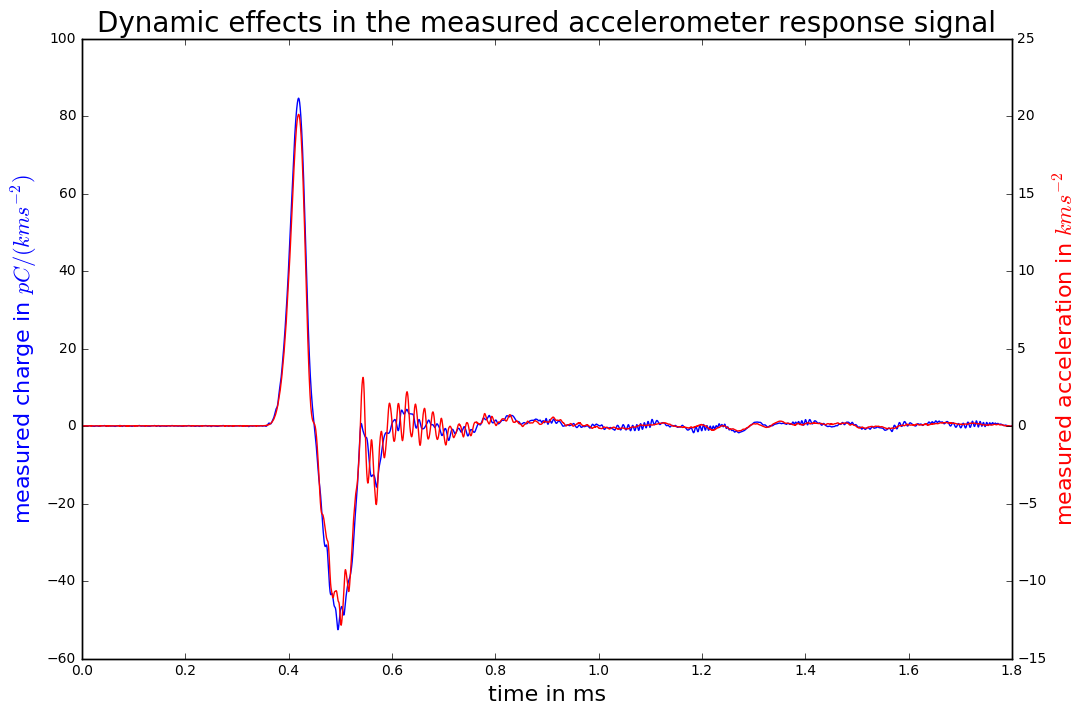

In [37]:
figure(figsize=(12,8))
plot(time*1e3, measured_input, label="measured input signal")
ylabel(r"measured charge in $pC/(kms^{-2})$", fontsize=16, color="b")
xlabel("time in ms", fontsize=16)
ax2 = gca().twinx()
ax2.plot(time*1e3, measured_output, "r", label="measured output signal")
ax2.set_ylabel(r"measured acceleration in $kms^{-2}$", fontsize=16, color="r")
title("Dynamic effects in the measured accelerometer response signal", fontsize=20);

In [50]:
sinusoidal_calib_results = loadtxt("sinusoidal_calibration_values.txt")
frequencies = sinusoidal_calib_results[:,0]
abs_values  = sinusoidal_calib_results[:,1]
unc_abs = r_[abs_values[(frequencies <= 5000)]*0.005, 
             abs_values[(5001 <= frequencies) & (frequencies <= 10000)]*0.0015,
             abs_values[(10001 <= frequencies) & (frequencies <= 15000)]*0.0025,
             abs_values[(15001 <= frequencies) & (frequencies <= 20000)]*0.005]
phase_values= sinusoidal_calib_results[:,2]
unc_phase = r_[ones(len(frequencies[frequencies<=5000]))*0.25, ones(len(frequencies[frequencies>5000]))*0.5]*pi/180


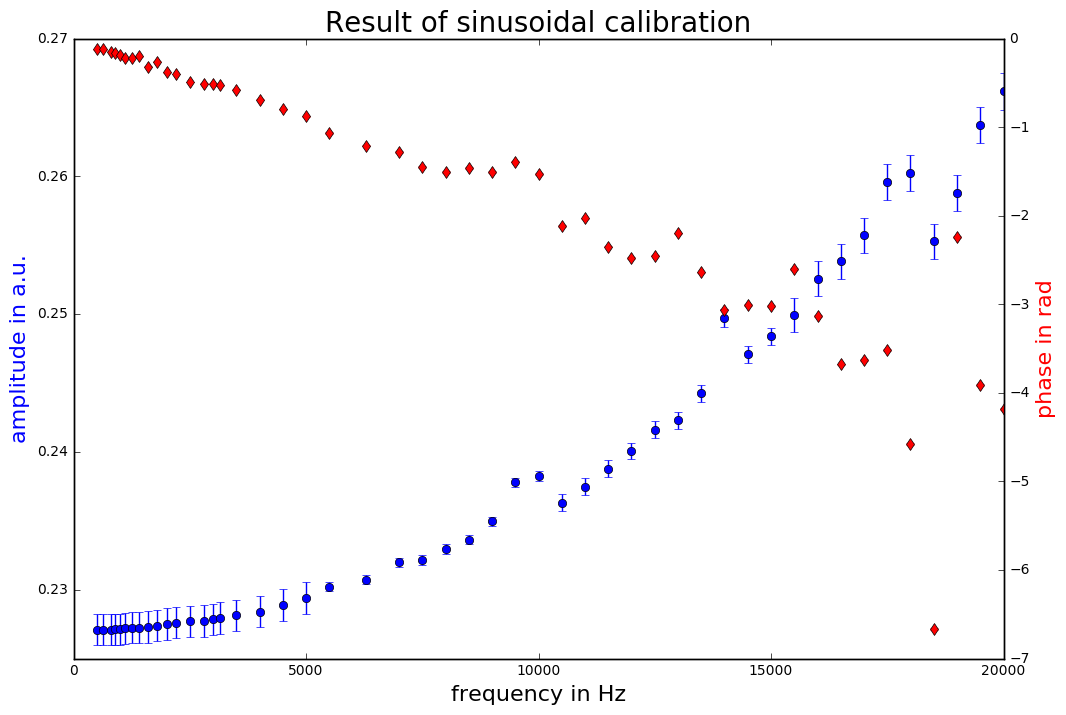

In [55]:
figure(figsize=(12,8))
errorbar(frequencies, abs_values, unc_abs, fmt="o")
xlabel("frequency in Hz", fontsize=16)
ylabel("amplitude in a.u.", fontsize=16, color="b")
title("Result of sinusoidal calibration", fontsize=20)
ax2 = gca().twinx()
ax2.errorbar(frequencies, phase_values, unc_phase, fmt="d", color="r")
ax2.set_ylabel("phase in rad", fontsize=16, color="r");